# Import Libraries


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

plt.style.use("fivethirtyeight")

import warnings
warnings.simplefilter(action='ignore')

# Loading Dataset

In [5]:
df=pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.xls")

### Previewing the First Few Rows of the Diabetes Dataset

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Explore Data

### Summary of the Diabetes Dataset Structure and Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### "Dataset Dimensions: Quick Overview of Rows and Columns

In [8]:
df.shape

(768, 9)

### Feature Names: Inspecting Dataset Columns

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Statistical Summary of the Diabetes Dataset

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Identifying Missing Values in the Diabetes Dataset

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Duplicate Records Check: Counting Redundant Rows in the Dataset

In [12]:
df.duplicated().sum()

0

# Data Analysis

### Distribution of Outcome Values in the Diabetes Dataset

In [13]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Percentage Distribution of Diabetes Outcomes

In [14]:
count_Diabetes=df['Outcome'].value_counts()*100/len(df)
count_Diabetes

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

### Pie Chart of Diabetes Outcome Distribution

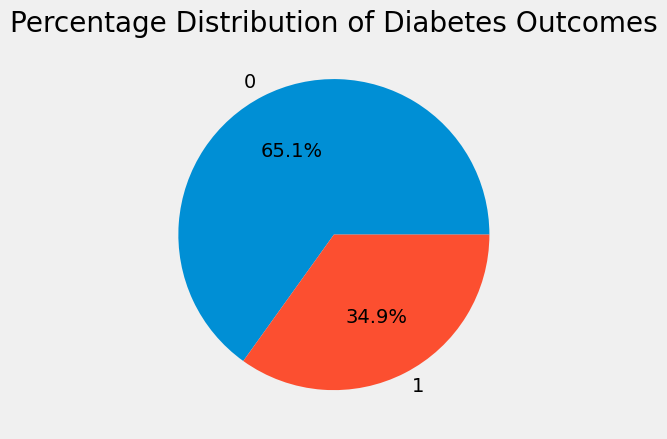

In [15]:
plt.pie(count_Diabetes,labels=count_Diabetes.index,autopct='%1.1f%%')
plt.title("Percentage Distribution of Diabetes Outcomes")
plt.show()

### Correlation Matrix of Features in the Diabetes Dataset

In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Correlation Matrix Heatmap: Analyzing Feature Relationships

Text(0.5, 1.0, 'Correlation Matrix')

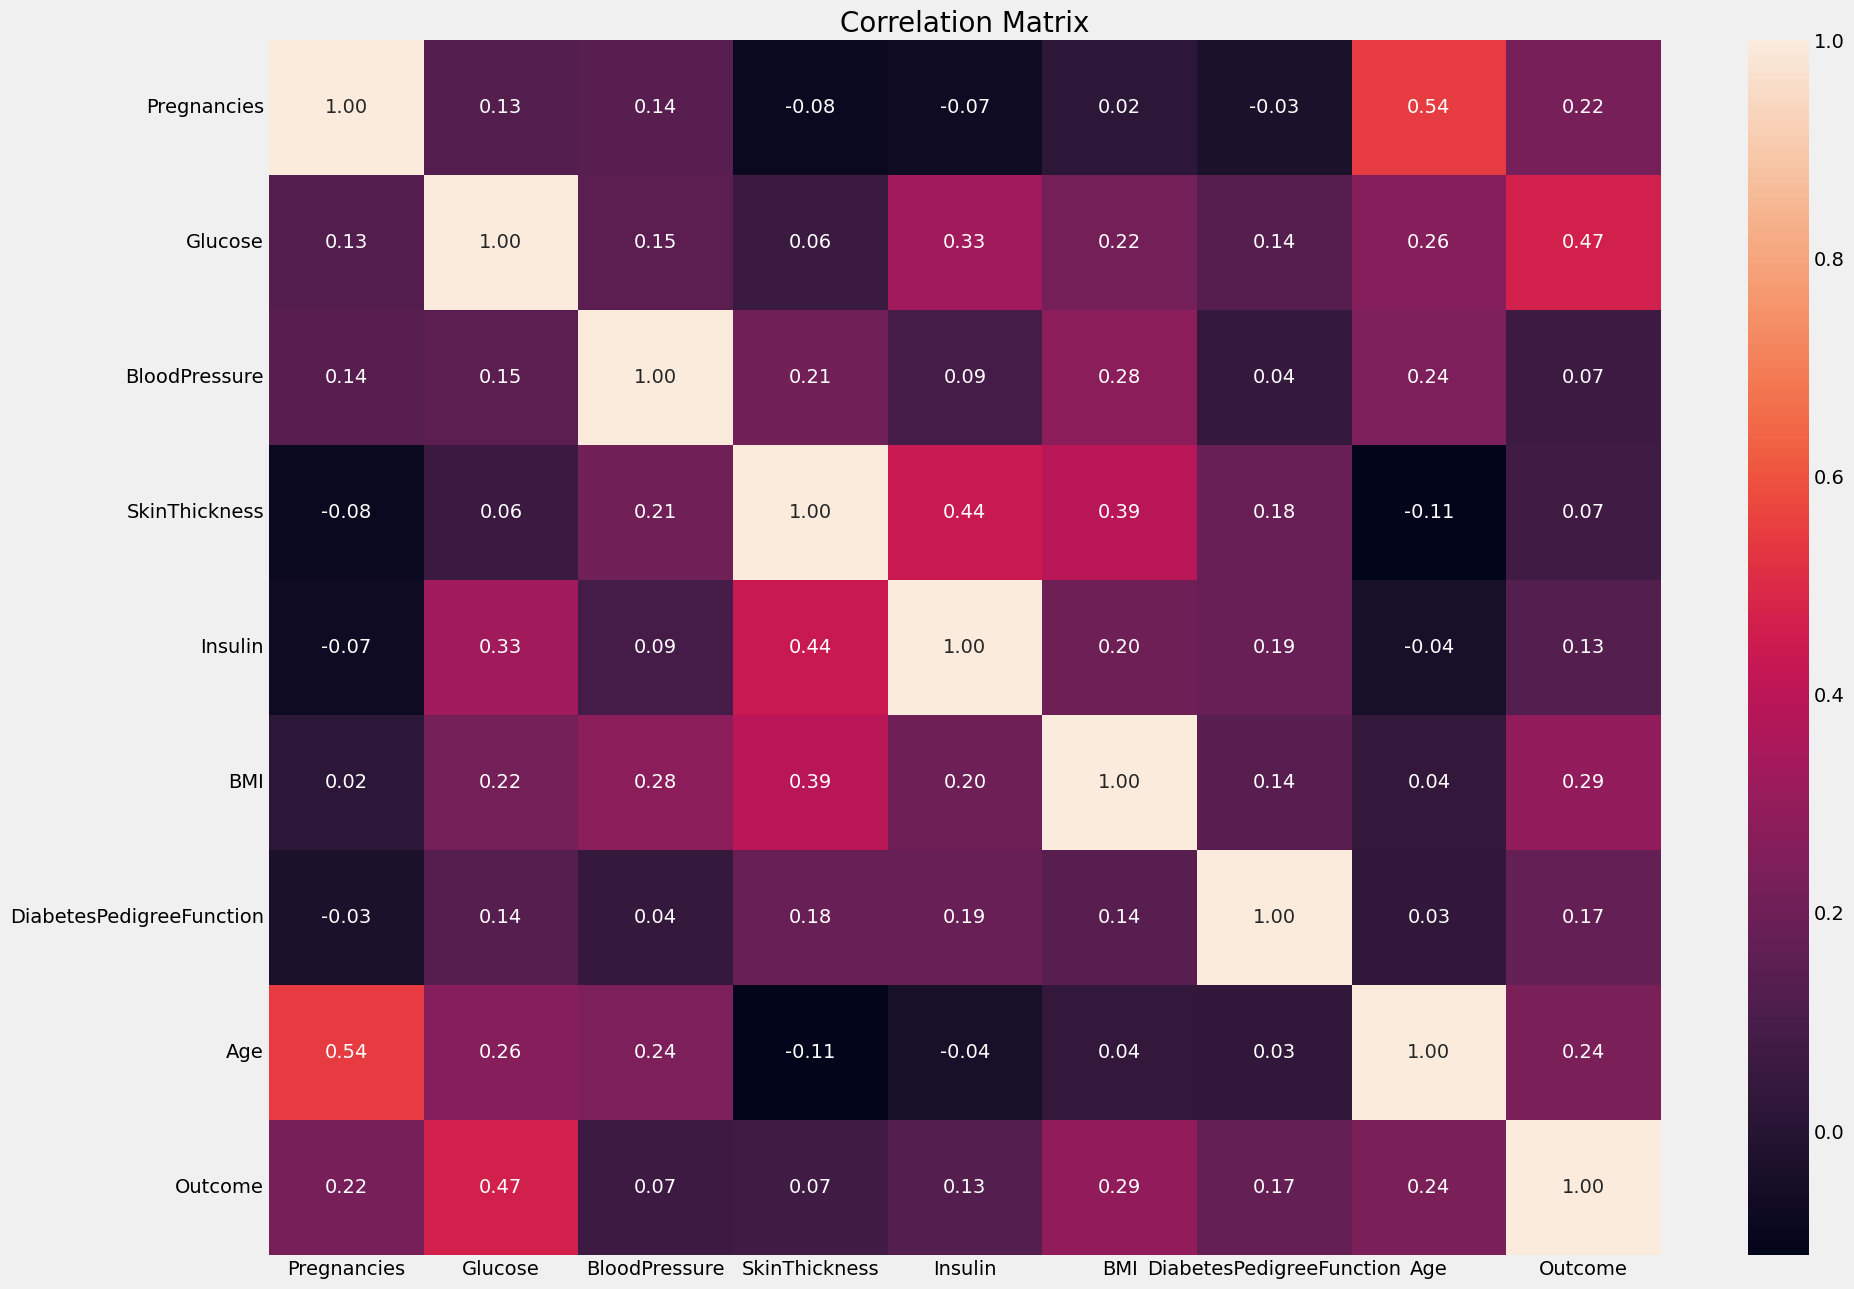

In [17]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(),annot=True,fmt='.2f')
ax.set_title("Correlation Matrix",fontsize=20)

### Age Range Summary: Maximum and Minimum Ages

In [18]:
max_age=df['Age'].max()
min_age=df['Age'].min()
print(f"Max Age Is : {max_age}")
print(f"Min Age Is : {min_age}")

Max Age Is : 81
Min Age Is : 21


### Age Distribution Analysis: Identifying Outliers with a Boxplot

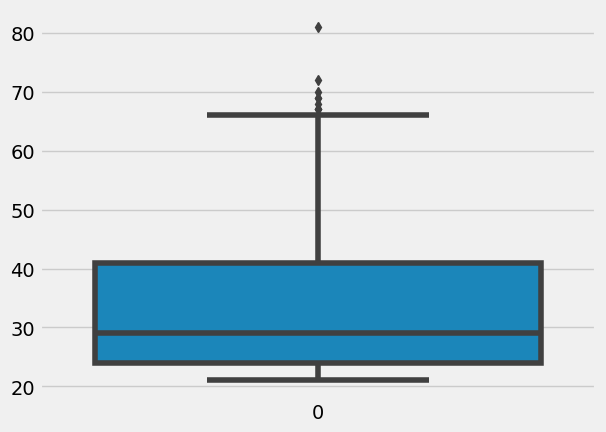

In [19]:
sns.boxplot(df["Age"])
plt.show()

### Pregnancies Feature Analysis: Count, Distribution, and Outlier Insights

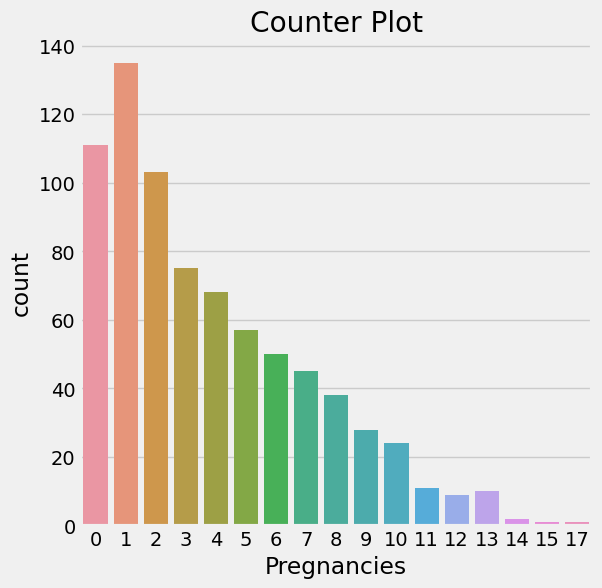

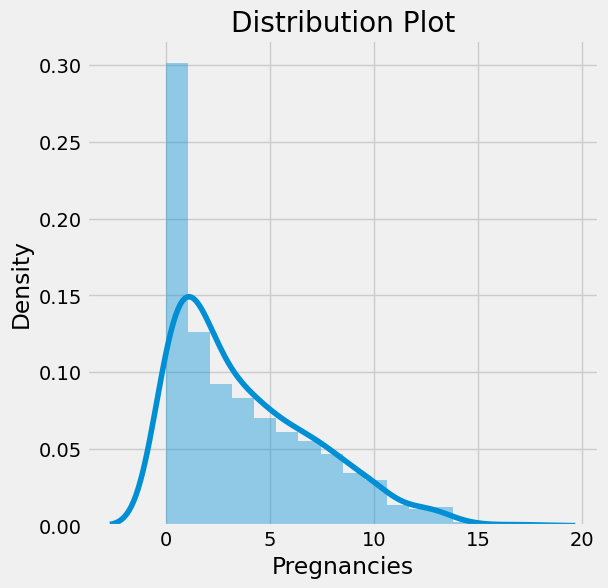

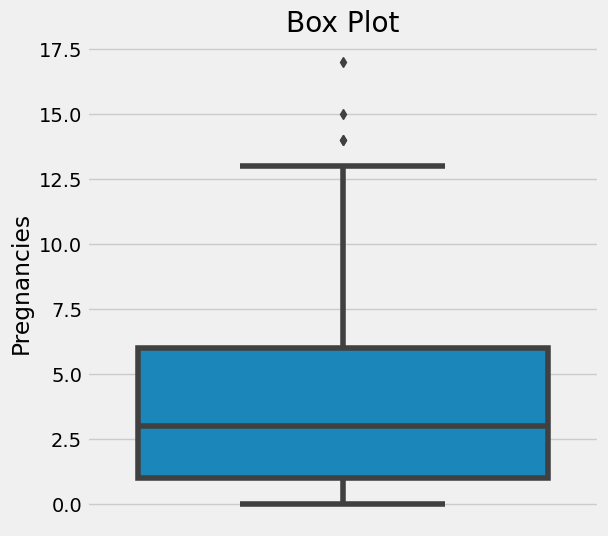

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x="Pregnancies",data=df)


plt.figure(figsize=(20,6))
plt.subplot(1,3,2)
plt.title("Distribution Plot")
sns.distplot(df["Pregnancies"])



plt.figure(figsize=(20,6))
plt.subplot(1,3,3)
plt.title("Box Plot")
sns.boxplot(y=df["Pregnancies"])
plt.show()

### Distribution of Key Features in the Dataset

<Axes: xlabel='Age', ylabel='Density'>

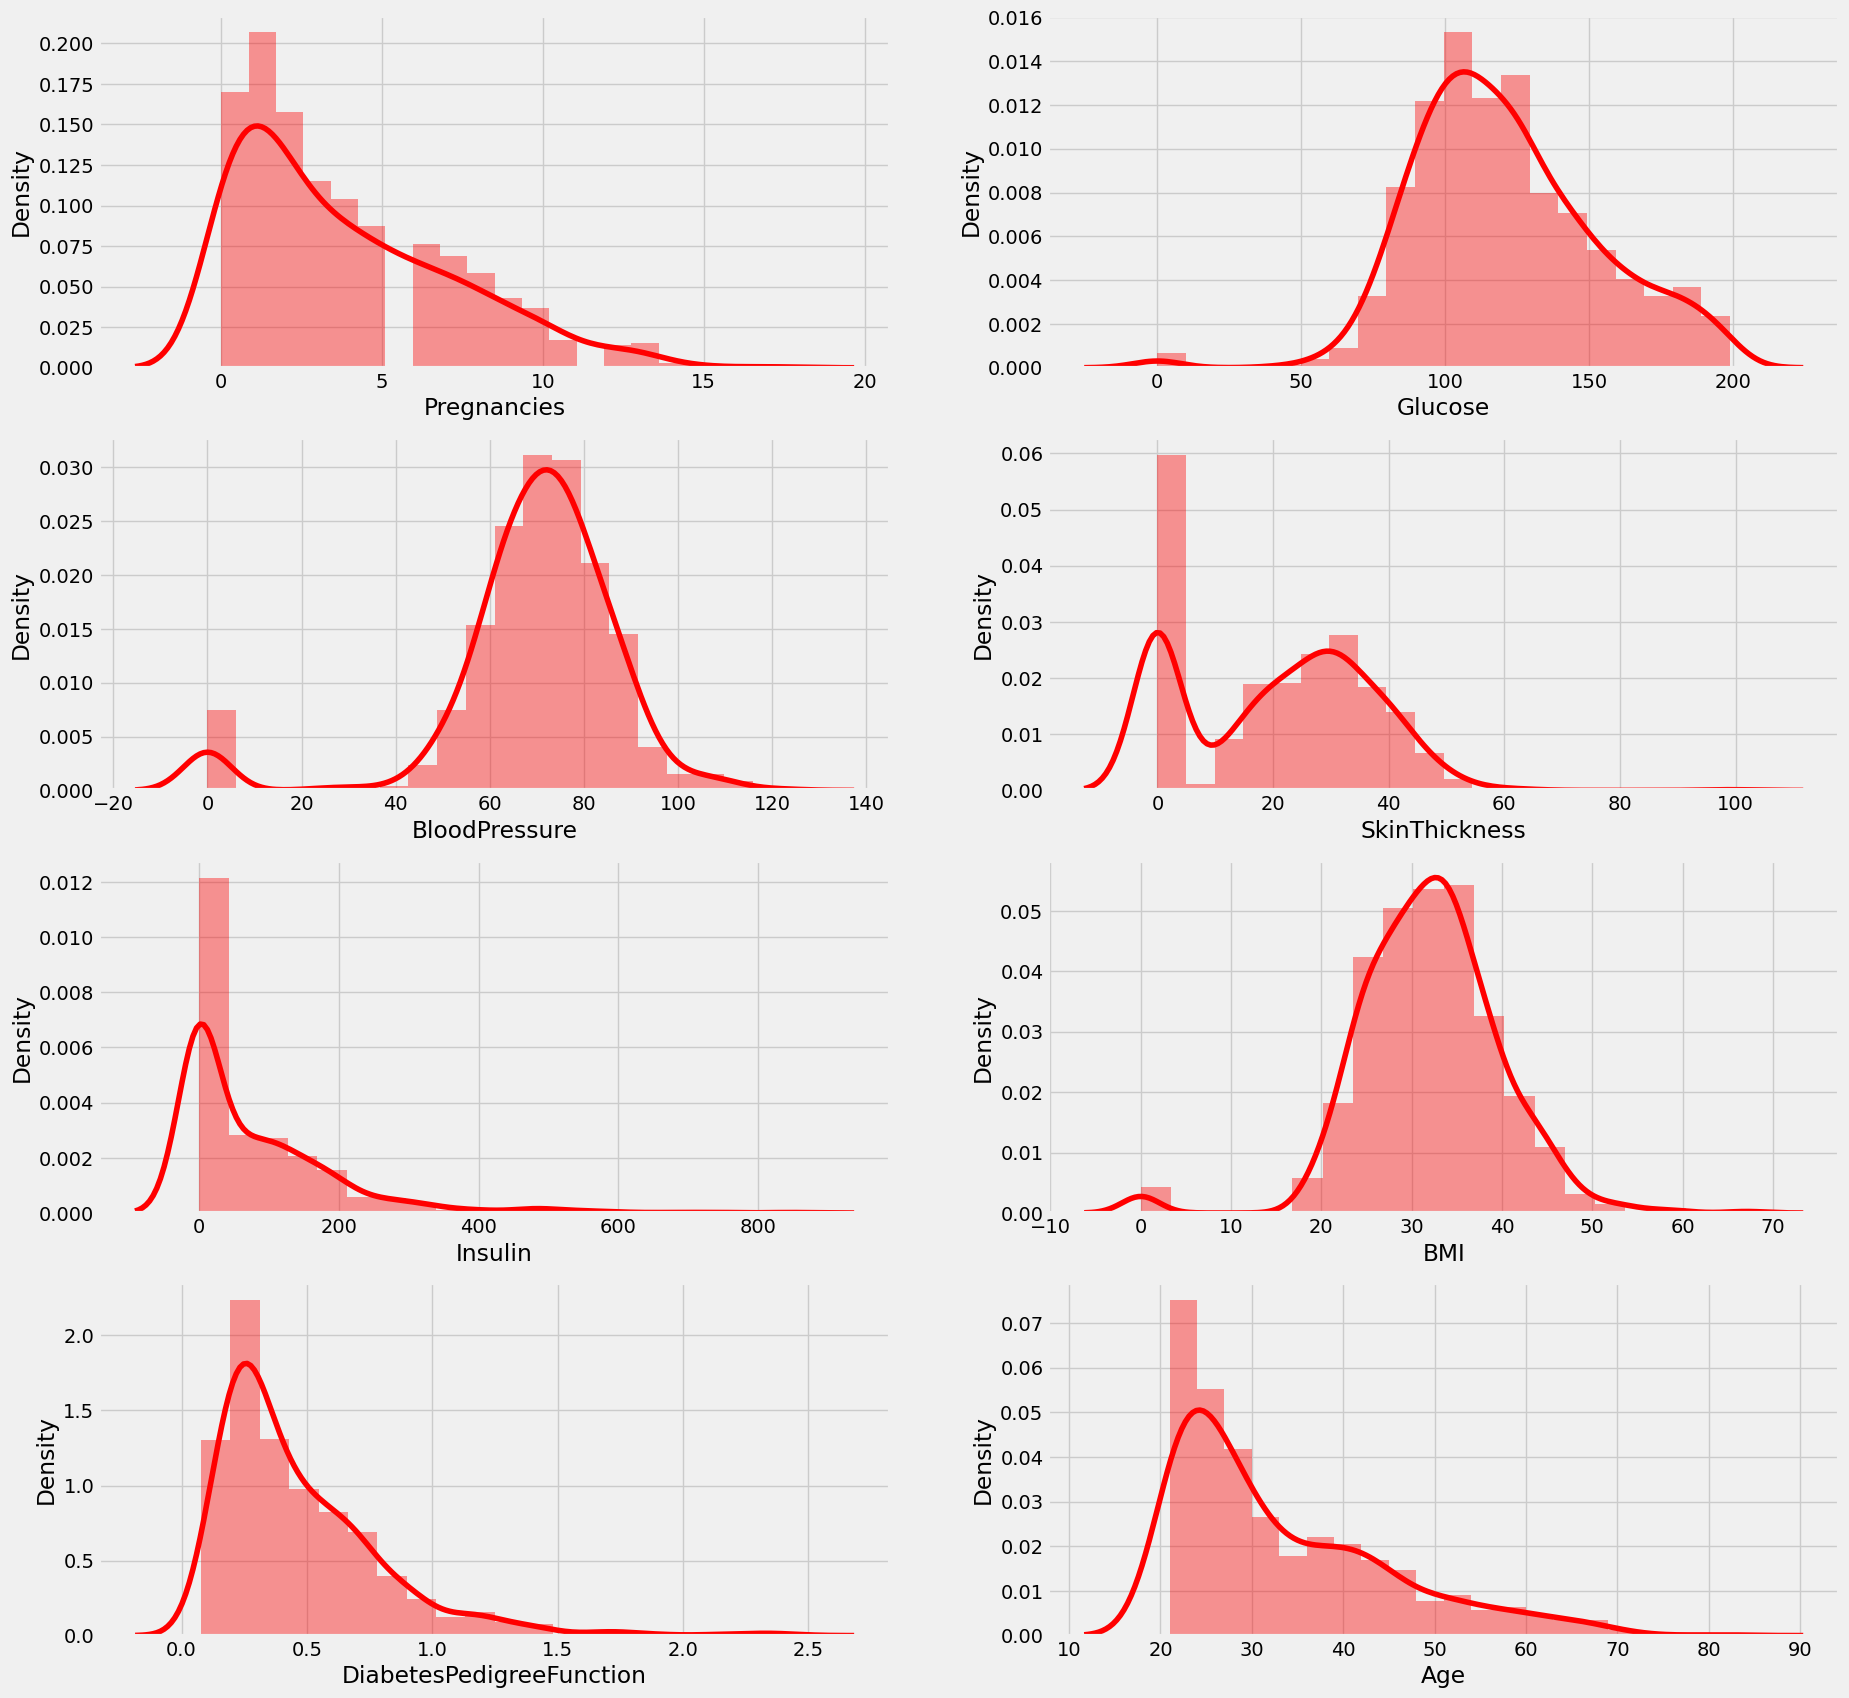

In [21]:
fig,ax = plt.subplots(4,2,figsize=(20,20))
sns.distplot(df['Pregnancies'],bins=20,ax=ax[0,0],color='red')
sns.distplot(df['Glucose'],bins=20,ax=ax[0,1],color='red')
sns.distplot(df['BloodPressure'],bins=20,ax=ax[1,0],color='red')
sns.distplot(df['SkinThickness'],bins=20,ax=ax[1,1],color='red')
sns.distplot(df['Insulin'],bins=20,ax=ax[2,0],color='red')
sns.distplot(df['BMI'],bins=20,ax=ax[2,1],color='red')
sns.distplot(df['DiabetesPedigreeFunction'],bins=20,ax=ax[3,0],color='red')
sns.distplot(df['Age'],bins=20,ax=ax[3,1],color='red')


### Average Number of Pregnancies by Outcome

In [22]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


### Maximum Number of Pregnancies by Outcome

In [23]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


### Glucose: Average Values for Each Outcome Group

In [24]:
df.groupby("Outcome").agg({"Glucose":"mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


### Maximum Glucose Concentration per Outcome Category

In [25]:
df.groupby("Outcome").agg({"Glucose":"max"})

,Glucose
Outcome,
0,197
1,199


### Pairplot of Features Colored by Outcome

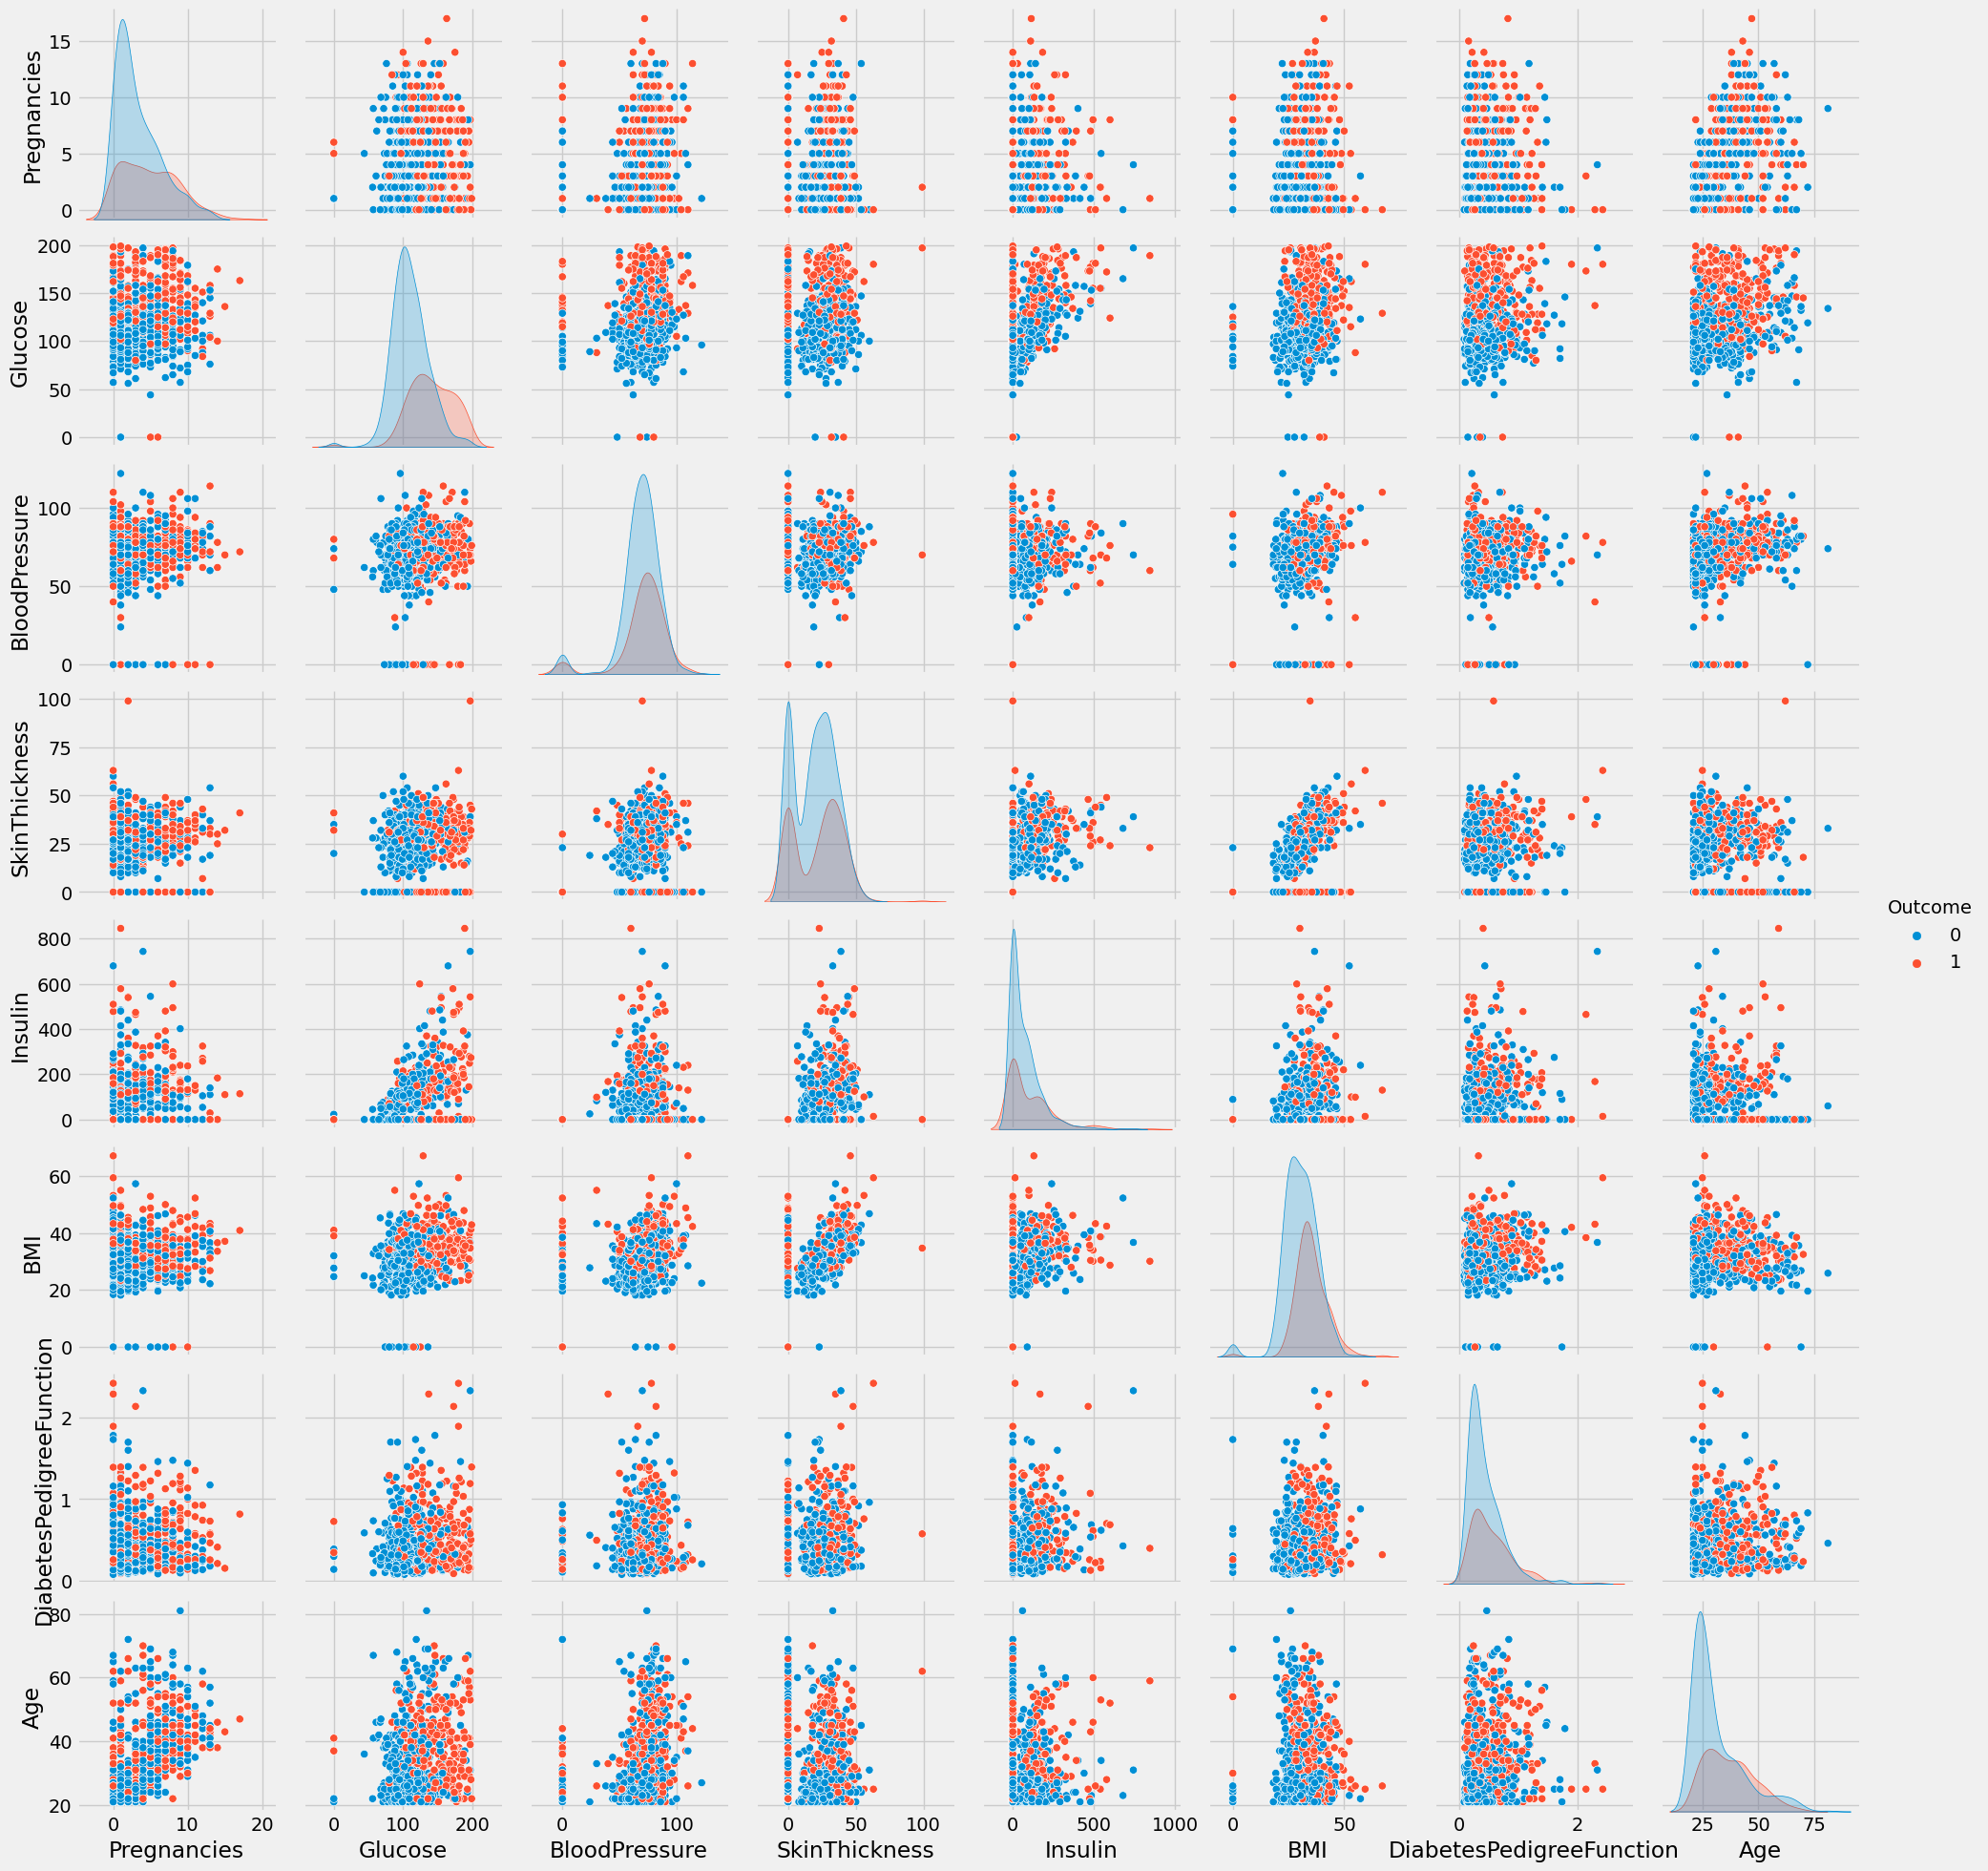

In [26]:
sns.pairplot(df,hue="Outcome")

### Distribution of Features: Histograms Overview

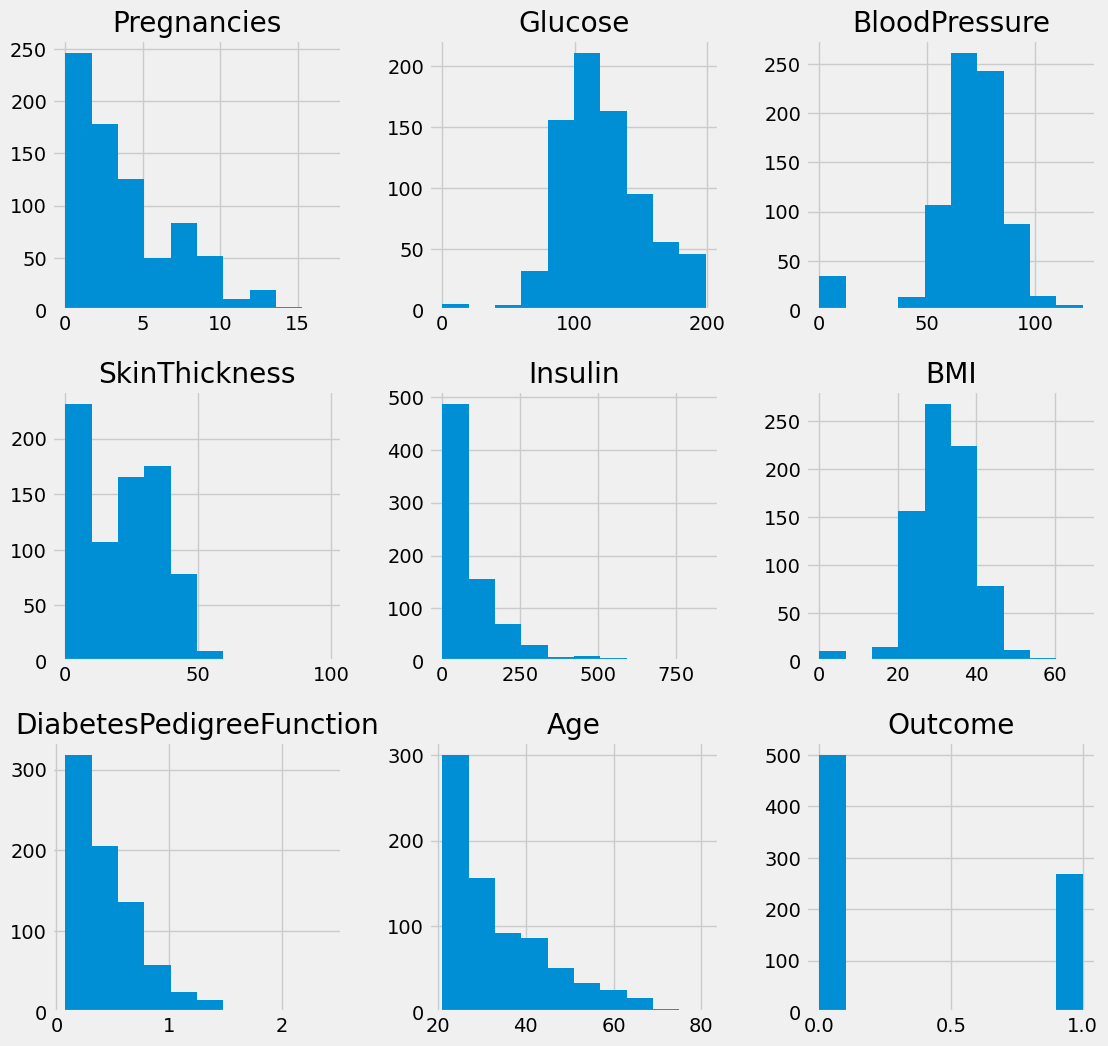

In [27]:
df.hist(figsize=(12,12))
plt.show()

# Buliding Model (Training and Prediction)

### DataFrame Excluding Outcome Column

In [28]:
x=df.drop("Outcome",axis=1)
y=df['Outcome']

### Balancing the Dataset: Applying Random Oversampling to Handle Class Imbalance

In [29]:
rm=RandomOverSampler(random_state=41)
x_res,y_res=rm.fit_resample(x,y)

### Class Distribution Before and After Random Oversampling

In [30]:
print("Old DataSet Shape{}".format(Counter(y)))
print("New DataSet Shape{}".format(Counter(y_res)))

Old DataSet ShapeCounter({0: 500, 1: 268})
New DataSet ShapeCounter({1: 500, 0: 500})


### Train-Test Split: 80% Training, 20% Testin

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=41)

### Dataset Split Overview: Shapes of Training and Test Sets

In [121]:
print(f"The Shape Of x_train is : {x_train.shape}")
print(f"The Shape Of x_test is : {x_test.shape}")
print(f"The Shape Of y_train is : {y_train.shape}")
print(f"The Shape Of y_test is : {y_test.shape}")

The Shape Of x_train is : (800, 8)
The Shape Of x_test is : (200, 8)
The Shape Of y_train is : (800,)
The Shape Of y_test is : (200,)


### Model Evaluation Setup: Logistic Regression, Random Forest, Gradient Boosting, Decision Tree, and SVC

In [122]:
models=["LogisticRegression","RandomForestClassifier", "GradientBoostingClassifier","DecisionTreeClassifier","SVC"]
result1=[]
result2=[]
result3=[]

### Model Training, Evaluation, and Confusion Matrix Visualization

In [123]:

def call(model):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)
    accuracy = accuracy_score(y_test, pre)
    recall = recall_score(y_test, pre, average='macro')
    f1 = f1_score(y_test, pre, average='macro')
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    print(model)
    print("*********************")
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("*******************************************************************************************")
    sns.heatmap(confusion_matrix(y_test, pre), annot=True, fmt="d")



### Model Initialization: Logistic Regression, Random Forest, Gradient Boosting, Decision Tree, and SVC"

In [124]:
model1=LogisticRegression()
model2=RandomForestClassifier(n_estimators=1000,class_weight="balanced",max_depth=None,min_samples_leaf=1,min_samples_split= 2)
model3=GradientBoostingClassifier(n_estimators=1000)
model4=DecisionTreeClassifier()
model5=SVC()


### Evaluating Logistic Regression Model

LogisticRegression()
*********************
Accuracy: 0.74
Recall: 0.7420714572460858
F1 Score: 0.7399739973997399
*******************************************************************************************


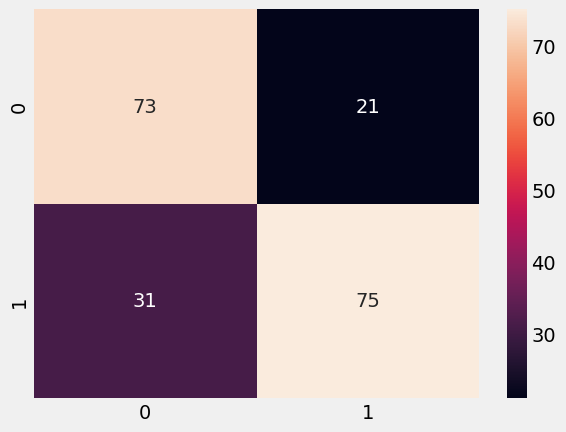

In [125]:
call(model1)

### Evaluating Random Forest Classifier Model

RandomForestClassifier(class_weight='balanced', n_estimators=1000)
*********************
Accuracy: 0.875
Recall: 0.8724407868325974
F1 Score: 0.8738616009485607
*******************************************************************************************


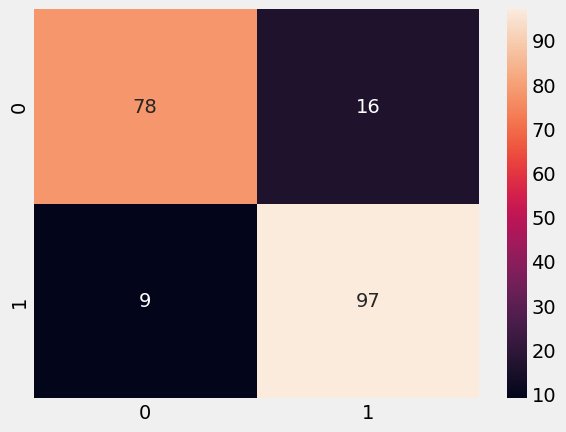

In [126]:
call(model2)

### Evaluating Gradient Boosting Classifier Model

GradientBoostingClassifier(n_estimators=1000)
*********************
Accuracy: 0.855
Recall: 0.8529706945002007
F1 Score: 0.8539447508247084
*******************************************************************************************


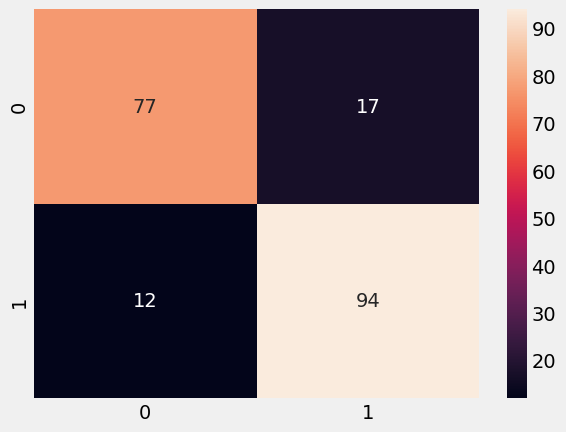

In [127]:
call(model3)

### Evaluating Decision Tree Classifier Model

DecisionTreeClassifier()
*********************
Accuracy: 0.775
Recall: 0.7696708149337615
F1 Score: 0.7708232538005144
*******************************************************************************************


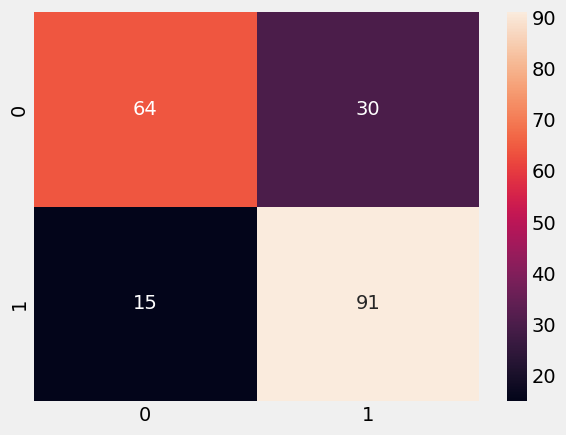

In [128]:
call(model4)

### Evaluating Support Vector Classifier (SVC) Model

SVC()
*********************
Accuracy: 0.69
Recall: 0.6918908069048575
F1 Score: 0.6899689968996899
*******************************************************************************************


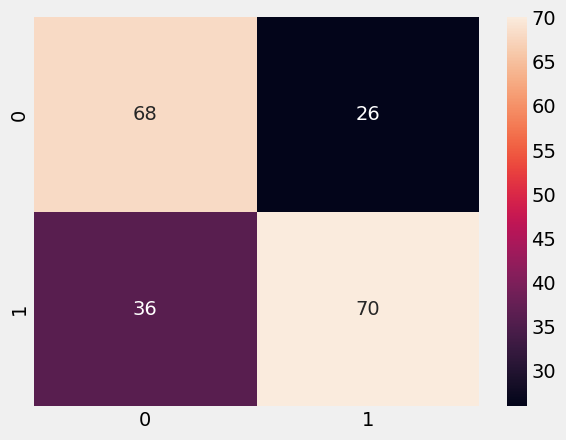

In [129]:
call(model5)

### Model Evaluation Metrics: Accuracy, Recall, and F1 Scor

In [130]:
print("Accuracies is :" ,result1)
print("recall is :",result2)
print("f1_score is :",result3)

Accuracies is : [0.74, 0.875, 0.855, 0.775, 0.69]
recall is : [0.7420714572460858, 0.8724407868325974, 0.8529706945002007, 0.7696708149337615, 0.6918908069048575]
f1_score is : [0.7399739973997399, 0.8738616009485607, 0.8539447508247084, 0.7708232538005144, 0.6899689968996899]


### Summary of Model Performance: Accuracy, Recall, and F1 Score

In [131]:
FinalResult=pd.DataFrame({"Algorithms":models,"Accuracies":result1,"Recall_Score":result2,"F1_Score":result3})
FinalResult

,Algorithms,Accuracies,Recall_Score,F1_Score
0,LogisticRegression,0.740,0.742071,0.739974
1,RandomForestClassifier,0.875,0.872441,0.873862
2,GradientBoostingClassifier,0.855,0.852971,0.853945
3,DecisionTreeClassifier,0.775,0.769671,0.770823
4,SVC,0.690,0.691891,0.689969


### Comparison of Model Performance Metrics: Accuracy, Recall, and F1 Score

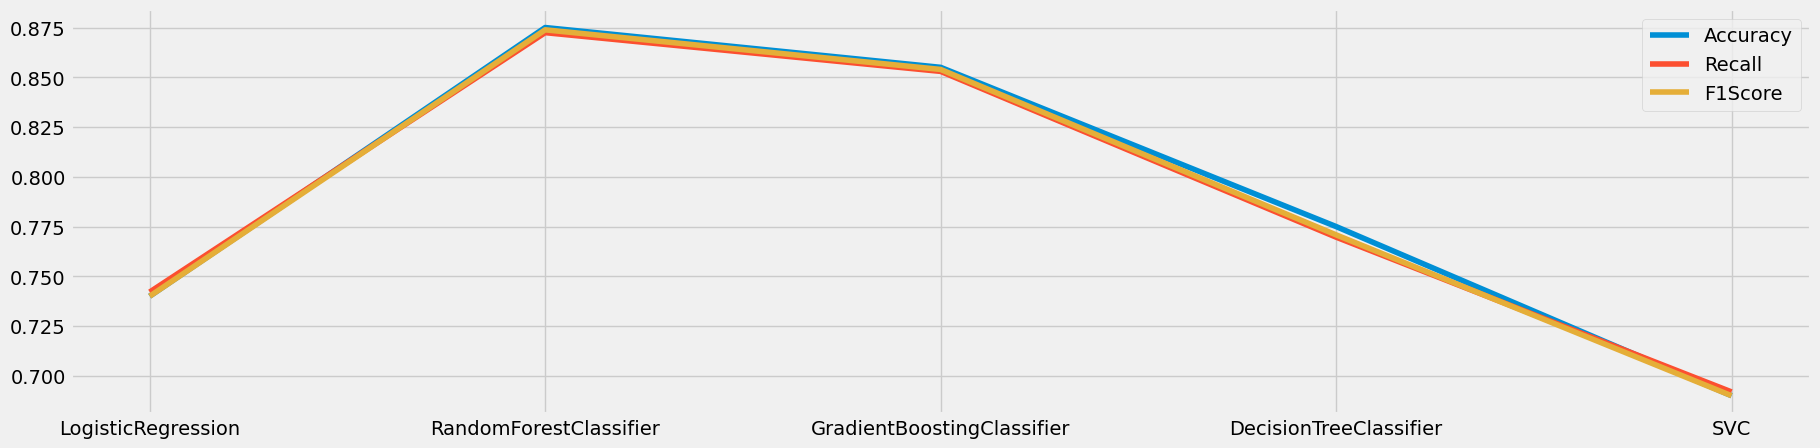

In [132]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult["Algorithms"],result1,label="Accuracy")
plt.plot(FinalResult["Algorithms"],result2,label="Recall")
plt.plot(FinalResult["Algorithms"],result3,label="F1Score")
plt.legend()
plt.show()